In [89]:
import nibabel as nib
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [90]:
subject_id = 1

epi_img = nib.load(f'subject_data/sub_00{subject_id}/sub-00{subject_id}_T1w_brain.nii.gz')
epi_img_data = epi_img.get_fdata()
epi_img_data.shape

(208, 256, 256)

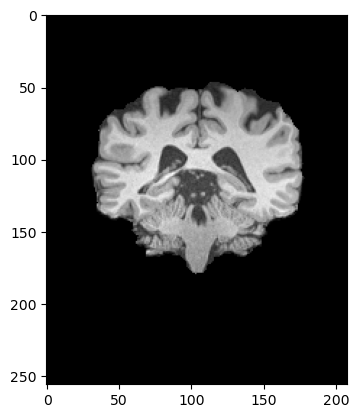

In [91]:
data = epi_img_data[:, 100, :]
data = np.rot90(data, k=1)
plt.imshow(data, cmap='gray')
plt.show()

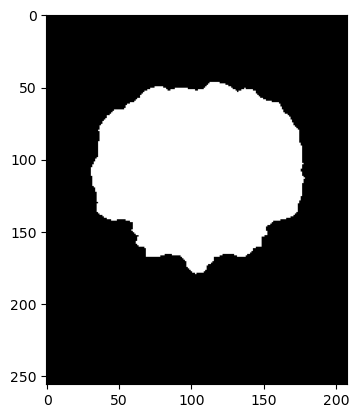

In [92]:
_, binary_image = cv.threshold(data, 1, 255, cv.THRESH_BINARY)
# binary_image = binary_image > 0
plt.imshow(binary_image, cmap='gray')
plt.show()

In [93]:
binary_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
epi_img_data.shape[1]

256

In [95]:
masks = []

for i in range(epi_img_data.shape[0]):
    data = epi_img_data[i, :, :]
    data = np.rot90(data, k=1)
    _, binary_image = cv.threshold(data, 1, 255, cv.THRESH_BINARY)
    masks.append(binary_image)

masks = np.stack(masks)

In [96]:
masks.shape

(208, 256, 256)

In [97]:
np.save(f'constructions/sub_00{subject_id}/sub-00{subject_id}_mask.npy', masks)